## 4836. 색칠하기
- 10 x 10 격자에 빨간색과 파란색을 칠하려고 함<br>
__Q. N개의 영역에 대해 왼쪽위와 오른쪽 아래 모서리 인덱스, 칠할 색상이 주어질 때 <u>칠이 끝난 후 색이 겹쳐 보라색이 된 칸수를 구하는 프로그램</u> 만들기__
  - 주어진 정보에서 같은 색인 영역은 겹치지 않음!

  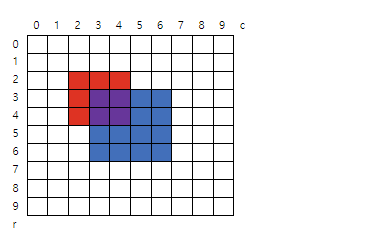


In [ ]:
# 3
# 2
# 2 2 4 4 1
# 3 3 6 6 2
# 3
# 1 2 3 3 1
# 3 6 6 8 1
# 2 3 5 6 2
# 3
# 1 4 8 5 1
# 1 8 3 9 1
# 3 2 5 8 2

In [28]:
#문제풀이

'''
생각
1. 10X10 이중 리스트 만들기
2. 리스트 에서 빨강은 1, 레드는 2 더해주기
3. 이중 for문으로 겹치는 보라색 부분인 3을 발견하면 purple에 1씩 더해주기
'''

T = int(input())

for i in range(T):
  N = int(input())
  board = [[0 for _ in range(10)] for _ in range(10)]  # 10x10 격자 만들기
  for _ in range(N):
    r1, c1, r2, c2, color = map(int, input().split())
    for l in range(r1, r2+1):
      for m in range(c1, c2+1):
        if color == 1:
          board[l][m] += 1
        else:
          board[l][m] += 2

  purple = 0   # 겹치는 부분
  for p in range(10):
    for u in range(10):
      if board[p][u] == 3:
        purple += 1
    
  print(f"#{i+1} {purple}")


3
2
2 2 4 4 1
3 3 6 6 2
#1 4
3
 1 2 3 3 1
3 6 6 8 1
2 3 5 6 2
#2 5
3
1 4 8 5 1
1 8 3 9 1
3 2 5 8 2
#3 7


## 4837.부분집합의 합
- 1부터 12까지의 숫자를 원소로 가진 집합 A가 있음<br>
__Q. 집합A의 부분집합 중 N개의 원소를 갖고 있고, 원소의 합이 K인 부분집합의 개수를 출력하는 프로그램을 작성하기__
  - 해당하는 부분집합이 없는 경우 0을 출력, 모든 부분집합을 만들어 답을 찾아도 됨
  - 예를 들어, N = 3, K = 6 경우, 부분집합은 {1,2,3}경우 1가지가 존재함



In [ ]:
# 3
# 3 6
# 5 15
# 5 10

In [2]:
#문제풀이 1(비트연산 사용)

'''
생각
1. 1~12인 리스트 A 만들기
2. 비트 연산자 이용하여 부분집합 생성
'''

T = int(input())

for i in range(T):
  A = [a for a in range(1, 13)]
  N, K = map(int, input().split())
  
  plus = 0
  for j in range(1 << len(A)): #부분집합의 개수(2^12)
    part = []
    for k in range(len(A)):  #원소의 수만큼 비트를 비교
      if j & (1 << k):       #j에서 K번째 비트가 1이면, part에 A[k]를 추가
        part.append(A[k])
    
    if len(part) == N and sum(part) == K:
      plus += 1
  
  print(f'#{i+1} {plus}')

3
3 6
#1 1
5 15
#2 1
5 10
#3 0


## 4839.이진탐색
- 코딩반 학생들에게 이진 탐색을 설명하던 선생님은 이진탐색을 연습할 수 있는 게임을 시켜 보기로 함

- 짝을 이룬 A, B 두 사람에게 교과서에서 각자 찾을 쪽 번호를 알려주면, 이진 탐색만으로 지정된 페이지를 먼저 펼치는 사람이 이기는 게임

  - 예를 들어 책이 총 400쪽이면, 검색 구간의 왼쪽 l=1, 오른쪽 r=400이 되고, 중간 페이지 c= int((l+r)/2)로 계산

  - 찾는 쪽 번호가 c와 같아지면 탐색을 끝냄

In [ ]:
# 3
# 400 300 350
# 1000 299 578
# 1000 222 888

In [3]:
def binarySearch(low, high, target, n):
  middle = (low+high) // 2

  if middle == target:
    return n
  
  elif target < middle:
    return binarySearch(low, middle, target, n+1)

  elif middle < target:
    return binarySearch(middle, high, target, n+1)


T = int(input())

for i in range(T):
  P, Pa, Pb = map(int, input().split())

  A = binarySearch(1, P, Pa, 0)
  B = binarySearch(1, P, Pb, 0)

  if A > B:
    print(f'#{i+1} B')
  elif A == B:
    print(f'#{i+1} 0')
  else:
    print(f'#{i+1} A')
  



3
400 300 350
#1 A
1000 299 578
#2 0
1000 222 888
#3 A


#4843. 특별한 정렬
- 보통의 정렬은 오름차순이나 내림차순으로 이루어지지만, 이번에는 특별한 정렬을 하려고 함

- N개의 정수가 주어지면 가장 큰 수, 가장 작은 수, 2번째 큰 수, 2번째 작은 수 식으로 큰 수와 작은 수를 번갈아 정렬하는 방법

- 예를 들어 1부터 10까지 10개의 숫자가 주어지면 다음과 같이 정렬함<br>
 

  ex) 10 1 9 2 8 3 7 4 6 5<br>
 

__Q.주어진 숫자에 대해 특별한 정렬을 한 결과를 10개까지 출력하기__

In [ ]:
# 3
# 10
# 1 2 3 4 5 6 7 8 9 10
# 10
# 67 39 16 49 60 28 8 85 89 11
# 20
# 3 69 21 46 43 60 62 97 64 30 17 88 18 98 71 75 59 36 9 26	 

In [88]:
#문제 풀이

'''
생각
1. input되는 리스트를 sort함수로 정렬하여 큰수, 작은수 대로 정렬하는 함수 만들기
2. 만든 함수를 적용하기
'''

#함수 정의(큰수, 작은수 순서대로 10개만 반환하도록 함수를 생성)
def sort(a):
  a.sort()
  lst = []
  for i in range(len(a)//2):
    lst.append(a[-1-i])
    lst.append(a[i])
  
  return lst[:10]


#생성한 함수를 입력
T = int(input())

for i in range(T):
  N = int(input())
  ai_list = list(map(int, input().split()))
  
  print(f'#{i+1} ', end='')
  for j in sort(ai_list):
    print( j, end = ' ')
  print()  

3
10
1 2 3 4 5 6 7 8 9 10
#1 10 1 9 2 8 3 7 4 6 5 
20
3 69 21 46 43 60 62 97 64 30 17 88 18 98 71 75 59 36 9 26
#2 98 3 97 9 88 17 75 18 71 21 
10
67 39 16 49 60 28 8 85 89 11
#3 89 8 85 11 67 16 60 28 49 39 
